# Submission Kelas Belajar Machine Learning untuk Pemula

Notebook ini ditujukan sebagai *submission* untuk syarat kelulusan kelas Belajar Machine Learning untuk Pemula di Dicoding. Tujuan dari program ini adalah untuk membuat program jaringan saraf tiruan yang mampu mengklasifikasikan suatu gambar tangan apakah membentuk gunting, batu, atau kertas.

Sebelumnya, kita akan melakukan *import library* yang dibutuhkan. Beberapa *library* tersebut diantaranya sebagai berikut.


1.   TensorFlow : library yang digunakan untuk pengembangan Machine Learning
2.   Adamax : optimizer yang akan digunakan
3.   ImageDataGenerator : membantu mempersiapkan dataset
4.   matplotlib.pyplot : plot history accuracy dan loss

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Kemudian kita perlu melakukan *import dataset* **rockpaperscissors** yang disediakan oleh Dicoding melalui link pada modul Submission.

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-13 18:46:34--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.52MB/s    in 40s     

2020-05-13 18:47:15 (7.67 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



File yang telah diimport berekstensi **.zip**, sehingga kita perlu mengekstraknya.

In [ ]:
import zipfile,os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
dataset_directory = '/tmp/rockpaperscissors/rps-cv-images/'

Selanjutnya kita perlu membuat ***ImageDataGenerator***.

In [ ]:
img_datgen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True,
        vertical_flip=True,
        rescale=1./255,
        validation_split=0.2)

Kemudian dilakukan augmentasi gambar pada masing-masing (*data training* dan *data validation*. Hal ini agar kita mendapatkan data-data baru dari *dataset* yang sudah ada sebelumnya. Kita gunakan *ImageDataGenerator* yang sudah kita buat sebelumnya.

In [ ]:
train_datgen = img_datgen.flow_from_directory(
        dataset_directory,
        target_size=(200, 300),
        class_mode='categorical',
        batch_size=16)

test_datgen = img_datgen.flow_from_directory(
        dataset_directory,
        target_size=(200, 300),
        class_mode='categorical',
        batch_size=16,
        subset='validation')

Found 2188 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


Setelah itu kita perlu membuat arsitektur CNN dengan model ***Sequential***.

In [ ]:
seq_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Kita juga dapat melihat *summary* dari model yang telah dibuat.

In [ ]:
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 298, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 149, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 147, 64)       18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 35, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 33, 128)      

Setelah model dibuat, kita akan menentukan ***loss function*** dan ***optimizer*** yang akan digunakan. Karena pada kasus gunting, batu, kertas ini terdapat lebih dari dua kelas, yaitu tiga kelas, maka kita gunakan *loss function* ***categorical_crossentropy***. Adapun *optimizer* yang digunakan adalah ***Adamax***.

In [ ]:
seq_model.compile(optimizer=Adamax(learning_rate=0.00146),
                  loss='categorical_crossentropy',
                  metrics='accuracy')

Sekarang waktunya kita melakukan *training* model yang telah kita buat.

In [ ]:
training = seq_model.fit(train_datgen,
                         epochs=25,
                         verbose=2,
                         validation_data=test_datgen,
                         steps_per_epoch=25,
                         validation_steps=5)

Epoch 1/25
25/25 - 51s - loss: 1.2619 - accuracy: 0.3625 - val_loss: 1.0502 - val_accuracy: 0.4250
Epoch 2/25
25/25 - 51s - loss: 1.0715 - accuracy: 0.4025 - val_loss: 1.0052 - val_accuracy: 0.4625
Epoch 3/25
25/25 - 51s - loss: 1.0430 - accuracy: 0.4400 - val_loss: 1.0322 - val_accuracy: 0.4500
Epoch 4/25
25/25 - 51s - loss: 0.9946 - accuracy: 0.4825 - val_loss: 0.9064 - val_accuracy: 0.6625
Epoch 5/25
25/25 - 50s - loss: 0.9466 - accuracy: 0.5425 - val_loss: 0.8164 - val_accuracy: 0.7826
Epoch 6/25
25/25 - 54s - loss: 0.6951 - accuracy: 0.7323 - val_loss: 0.7149 - val_accuracy: 0.6875
Epoch 7/25
25/25 - 51s - loss: 0.6192 - accuracy: 0.7625 - val_loss: 0.6670 - val_accuracy: 0.6750
Epoch 8/25
25/25 - 51s - loss: 0.5630 - accuracy: 0.7800 - val_loss: 0.4670 - val_accuracy: 0.8000
Epoch 9/25
25/25 - 53s - loss: 0.4865 - accuracy: 0.7900 - val_loss: 0.5658 - val_accuracy: 0.8000
Epoch 10/25
25/25 - 50s - loss: 0.4384 - accuracy: 0.8400 - val_loss: 0.3317 - val_accuracy: 0.9130
Epoch 11/

Kita dapat membuat *plot* *loss* dan *accuracy* model yang dibuat dengan *library* **matplotlib**.

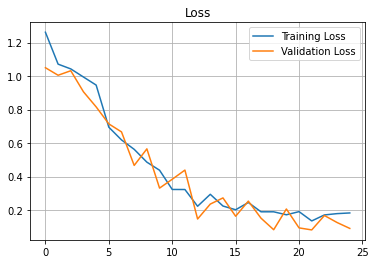

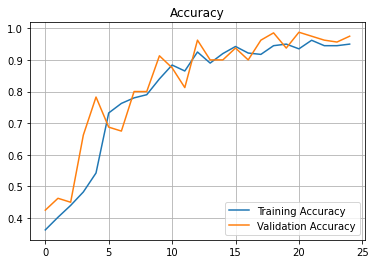

In [ ]:
plt_loss = [training.history['loss'],training.history['val_loss']]

plt.plot(range(len(plt_loss[0])), plt_loss[0], label='Training Loss')
plt.plot(range(len(plt_loss[1])), plt_loss[1], label='Validation Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()
plt.show()

plt_acc = [training.history['accuracy'],training.history['val_accuracy']]

plt.plot(range(len(plt_acc[0])), plt_acc[0], label='Training Accuracy')
plt.plot(range(len(plt_acc[1])), plt_acc[1], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Untuk membuat program yang dapat memprediksi gambar yang kita unggah, dibawah ini adalah *code*-nya.

Saving T8GWcDJlUuzt12VL.png to T8GWcDJlUuzt12VL.png
T8GWcDJlUuzt12VL.png
[[0. 0. 1.]]
Scissors


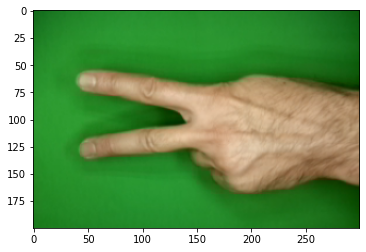

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # prediksi gambar yang diunggah
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = seq_model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)
  if classes[0][0] == 1 :
    print('Paper')
  elif classes[0][1] == 1 :
    print('Rock')
  elif classes[0][2] == 1 :
    print('Scissors')
  else :
    print('Error')